## Extra Practice: Application to sea surface temperature data

## Instructor's Solution: reading and displaying sea surface temperature (SST)

## Load a few important packages.

In [5]:
## A few necessary packages.
import numpy as np
from netCDF4 import Dataset #Dataset, MFDataset
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
import scipy.signal as signal

### Note: since sea surface temperature has dimensions [time,lat,lon], we select the first and only time step in the file.

In [6]:
# Define the filename.
pname = "../data/sea_surface_temperature/" # remember the slash on the end of the pathname
fname = "20200717120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc"
infile = pname+fname

# Read the metadata of the file. This is equivalent to an "ncdump -h RSS_smap.nc" command at the terminal
# window or command line.
#test = xr.open_dataset(infile,decode_times=False)
#print(test.info())

# Read in the data from the netcdf file.
# We use the netCDF4 package to read the netcdf file.
nc = Dataset(infile, "r")
etime = nc.variables["time"][:] # time in seconds since 2000/01/00 00:00
lat = nc.variables["lat"][:] # latitude (degrees), values = [-90, 90]
lon = nc.variables["lon"][:] # longitude (degrees), values = [-180, 180]
analysed_sst = nc.variables["analysed_sst"][0,:,:] # sea_surface_temperature, Kelvin

In [7]:
# Read in the data from the netcdf file.
# We use the netCDF4 package to read the netcdf file.
nc = Dataset(infile, "r")
etime = nc.variables["time"][:] # time in seconds since 1981/01/00 00:00
lat = nc.variables["lat"][:] # latitude (degrees), values = [-90, 90]
lon = nc.variables["lon"][:] # longitude (degrees), values = [0, 360]
analysed_sst = nc.variables["analysed_sst"][0,:,:] # sea surface temperature in units of Kelvin

# Access the "data" portion of the variable, as python handles this as a masked array.
etime = etime.data
lat = lat.data
lon = lon.data
sst = analysed_sst.data

### Note: we subtract 273.15 to convert from Kelvin to degC.

In [8]:
# Convert some variables to double precision (float64).
lat = np.double(lat)
lon = np.double(lon)
sst = np.double(sst) - 273.15 # subtract 273.15 to obtain deg C

nlat = len(lat)
nlon = len(lon)
sdata = sst.shape

### Note: the dataset is large. It requires a lot of memory to plot. We therefore subset the dataset first, then plot.

### Note: the dataset is given to us in the form -180 deg to 180 deg in terms on longitude. Thus, we do not have to handle the dataset seam at longitude = 0 deg as we did for the SSS dataset.

(This should therefore be easier!)

In [9]:
# This part is tricky because we need to obtain data across the seam.
# The smart way would be to circularly-shift the data in the column (longitude)
# direction. But, another method is to paste the two blocks into a larger matrix.

# Subset for the region of interest.
latlim = np.array([-10.0,10.0])
lonlim = np.array([-20.0,15.0])
latlim = np.double(latlim)
lonlim = np.double(lonlim)
ilat1 = (lat >= latlim[0]) & (lat <= latlim[1])
ilon1 = (lon >= lonlim[0]) & (lon < lonlim[1]);
ilat = ilat1;
ilon = ilon1;

lats = lat[ilat1]
lons = lon[ilon1]

index1 = np.array(np.where(ilat))
index2 = np.array(np.where(ilon))
#print(index1)
#print(index2)
sst_block1 = sst[ilat,:]
sst_block1 = sst_block1[:,ilon]

nlats = len(lats)
nlons = len(lons)
sst_block = np.zeros([nlats,nlons])
sst_block[0:nlats,0:nlons] = sst_block1

# Form a mask for the land.
# This mask uses the bad values to identify land.
mask = np.zeros([nlats,nlons])
igood = (sst_block >= -3) # find good values
mask[igood] = 1
inan = (sst_block < -3) # find bad values
mask[inan] = np.nan # not a number

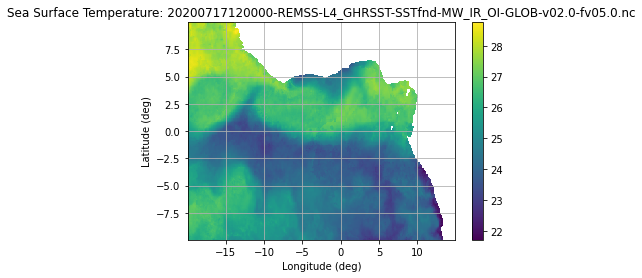

In [16]:
# Plot the sea surface temperature.
plt.pcolor(lons,lats,sst_block*mask)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.title('Sea Surface Temperature: '+fname) # here we need to insert a date inside the brackets
plt.grid()
plt.colorbar()
outfile = "Lesson1_extra.png"
plt.savefig(outfile,format='png',dpi=200)

# Note that we had to get rid of the plt.show() command.
# Please ask Dr. Paige Martin why this is.